In [0]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np

# Matrices everywhere

Linear algebra is the arithmetic of points in space. We can take any 2d coordinate and transform it by multiplying it by a matrix: $\begin{pmatrix} cos(\theta) & -sin(\theta) \\ sin(\theta) & cos(\theta) \end{pmatrix}$ to rotate it or $\begin{pmatrix} S_{xx} & S_{xy} \\ S_{yx} & S_{yy} \end{pmatrix}$ to scale it.

Translation of a 2d vector isn't so clean: no `2x2` matrix can translate a 2d coordinate from one location to another. So far, we've translated 2d coordinates simply by adding them with another vector $v_t = v + t$.

Modern computers and Machine Learning algorithms take advantage of GPU acceleration. Graphics Processing Units (GPU) are just massively parallel matrix multiplication machines, and they work because a method has been devised that allows us to transform points in any space $D$ by multiplying them with a matrix of size $(D+1,D+1)$.

## Homogeneous coordinates

A homogeneous coordinate adds an extra dimension to a vector $v = \begin{pmatrix}x \\ y\end{pmatrix}$. In homogeneous coordinates, $v = \begin{pmatrix}x \\ y \\ 1\end{pmatrix}$. The third dimension is ignored in 2d, but matters in 3d. We won't cover the implications of the third dimension in this course, but will treat it always as 1.

Now, our transformation matrices become 3d as well:

$R = \begin{pmatrix}cos(\theta) & -sin(\theta) & 0 \\ sin(\theta) & cos(\theta) & 0 \\ 0 & 0 & 1\end{pmatrix}$

$S = \begin{pmatrix} S_{xx} & S_{xy} & 0 \\ S_{yx} & S_{yy} & 0 \\ 0 & 0 & 1\end{pmatrix}$

$T = \begin{pmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \\ 0 & 0 & 1\end{pmatrix}$

Any transformation of points is a composition of matrices! Consider 

$T_oRST_nv$

the composition of matrices that translates a group of vectors to the origin, rotates them, scales them, then moves them to another location.


# Animation

Consider the following set of points $v$:

(-5, 5)

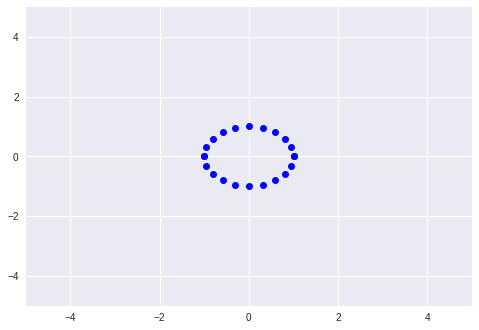

In [4]:
import matplotlib.pyplot as plt

p = np.linspace(-np.pi/2,np.pi/2,11)
x = np.sin(p)

v = np.column_stack((np.concatenate((x,x)),np.concatenate((np.cos(p),-np.cos(p)))))

plt.plot(v[::,0:1:],v[::,1:2:],'bo')
plt.ylim(-5,5)
plt.xlim(-5,5)

These points can be scaled, rotated, and translated using the above matrices:

R =  [[ 0.98006658 -0.19866933  0.        ]
 [ 0.19866933  0.98006658  0.        ]
 [ 0.          0.          1.        ]]
S =  [[2.5 0.  0. ]
 [0.  2.5 0. ]
 [0.  0.  1. ]]
T =  [[ 1  0  0]
 [ 0  1  0]
 [12  9  1]]


(-15, 15)

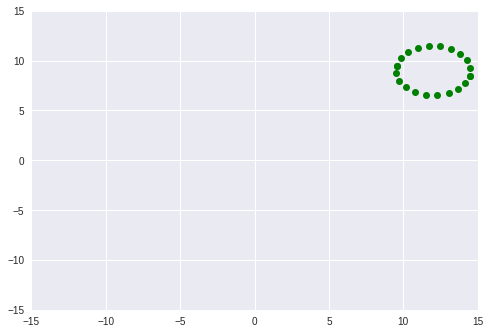

In [5]:
R = np.matrix([[np.cos(0.2),-np.sin(0.2),0],[np.sin(0.2),np.cos(0.2),0],[0,0,1]])
S = np.matrix([[2.5,0,0],[0,2.5,0],[0,0,1]])
T = np.matrix([[1,0,0],[0,1,0],[12,9,1]])

print("R = ", R)
print("S = ", S)
print("T = ", T)

M = R * S * T

# Add a homogeneous coordinate to v!
v1 = np.column_stack((v,[1]*len(v[::,0:1:])))

r = v1 * M

plt.plot(r[::,0:1:],r[::,1:2:],'go')
plt.ylim(-15,15)
plt.xlim(-15,15)


# Thursday Assignment

Write an animation for rolling the ball along the 0 axis, out to 15, and back again.


In [0]:
from matplotlib import animation, rc
from IPython.display import HTML

In [0]:
v_h = np.column_stack((v[:,0], v[:,1], np.ones(v.shape[0]))).T

In [0]:
def get_translation_matrix(tx, ty):
    T = np.matrix([[1, 0, tx],
                   [0, 1, ty],
                   [0, 0, 1]])
    return np.asmatrix(T)

def get_rotation_matrix(theta):
    R = np.matrix([[np.cos(theta), -np.sin(theta), 0],
                   [np.sin(theta), np.cos(theta), 0], 
                   [0, 0, 1]]).T
    return R

In [0]:
def roll(v, theta, radius=1.0):
    """Takes a zero-centered circle with of some radius and 'rolls it' by 
    rotating and translating. Also translates up to the x axis.
    
    Args:
        v (numpy.ndarray): the set of points in a circle in homogeneous coordinates
        theta (float): the angle by which to rotate the circle
        radius (float): the radius of the circle
        
    Returns:
        The ndarray representing the set of points in the rolled circle
    """
    R = get_rotation_matrix(theta)
    
    arc = radius*theta
    T = get_translation_matrix(arc, 1)
    
    return T * R * v

In [0]:
thetas = np.concatenate([np.linspace(0, 15, 100), np.linspace(15, 0, 100)])

In [0]:
fig, ax = plt.subplots()
plt.close()

ax.set_xlim((-1, 16))
ax.set_ylim((-1, 3))
ax.set_aspect('equal')

points, = ax.plot([], [], 'bo')
top, = ax.plot([], [], 'ro')

In [0]:
def init():
    points.set_data([], [])
    top.set_data([], [])
    return (points, top,)

def animate(i):
    theta = thetas[i]
    v = roll(v_h, theta)
    
    points.set_data(v[0], v[1])
    top.set_data(v[0,-6], v[1,-6])
    return (points,top,)

In [13]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(thetas), interval=100, 
                               blit=True)
rc('animation', html='jshtml')
anim